# Lesson 0015 - MNIST Classification Deep Neural Network
In this lesson, we extend the approach from [lesson 0014](https://github.com/Mathhead/Lessons-in-Machine-Learning/blob/master/lesson_0014_mnist_classification_neural_network.ipynb): we will train a deep neural network.<br>
Obviously, we can and we will steal lots of code from [lesson 0014](https://github.com/Mathhead/Lessons-in-Machine-Learning/blob/master/lesson_0014_mnist_classification_neural_network.ipynb).

In [1]:
import tensorflow as tf

tf.set_random_seed( 1234567890 )

print( tf.__version__ )

C:\Users\Robert\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


1.12.0


In [2]:
( train_x, train_y ),( test_x, test_y ) = tf.keras.datasets.mnist.load_data()

In [3]:
import numpy as np

np.random.seed( 1234567890 )

print( np.__version__ )

1.14.3


In [4]:
import matplotlib
import matplotlib.pyplot as plt

print( matplotlib.__version__ )

2.2.2


In [5]:
mu = np.mean( train_x )

sigma = np.std( train_x )



train_x = ( train_x - mu ) / sigma

test_x = ( test_x - mu ) / sigma

In [6]:
train_x_f = np.zeros( shape = [ 60000, 28 * 28 ] )

train_y_f = np.zeros( shape = [ 60000, 10 ] )

test_x_f = np.zeros( shape = [ 10000, 28 * 28 ] )

test_y_f = np.zeros( shape = [ 10000, 10 ] )




for i in range( 60000 ):
    
    train_y_f[ i, train_y[ i ] ] = 1.0
    
    
for i in range( 10000 ):
    
    test_y_f[ i, test_y[ i ] ] = 1.0
    

for i in range( 60000 ):
    
    dummy = np.array( train_x[ i ] )
    
    train_x_f[ i, : ] = dummy.flatten()
    
    
for i in range( 10000 ):
    
    dummy = np.array( test_x[ i ] )
    
    test_x_f[ i ] = dummy.flatten()
    
    
    
    
train_x = train_x_f

train_y = train_y_f

test_x = test_x_f

test_y = test_y_f

Now that we have prepared the data, we will design a deep neural network. We will use<br>
-  an input layer of $28*28$ pixels
-  a second layer of $28*28$ hidden neurons, just like in [lesson 0014](https://github.com/Mathhead/Lessons-in-Machine-Learning/blob/master/lesson_0014_mnist_classification_neural_network.ipynb)
-  a third layer of $512$ hidden neurons, just like the second layer
-  a fourth layer of $256$ hidden neurons, just like the second layer
-  a fifth layer of $128$ hidden neurons, just like the second layer
-  a sixth layer of $64$ hidden neurons, just like the second layer
-  a seventh layer of $32$ hidden neurons, just like the second layer
-  and finally an output layer of $10$ neurons<br>

We use this archtitecture, because, we hope that the information is combined in the consecutive layers to higher abstraction levels.<br>
We train this model for $10000$ iterations with $100$ randomly drawn training data, and after iteration $1000$, we check every $500$ iterations, whether we improved on the test set on average. If we did not improve, we break the training.<br>
We apply a learning rate of $0.000001$.

In [7]:
x_tf = tf.placeholder( tf.float32, shape = [ None, 28 * 28 ] )

y_tf = tf.placeholder( tf.float32, shape = [ None, 10 ] )




W_tf_1 = tf.Variable( tf.truncated_normal( [ 28 * 28, 28 * 28 ] ) )

b_tf_1 = tf.Variable( tf.truncated_normal( [ 28 * 28 ] ) )

layer_2 = tf.nn.leaky_relu( tf.matmul( x_tf, W_tf_1 ) + b_tf_1 )




W_tf_2 = tf.Variable( tf.truncated_normal( [ 28 * 28, 512 ] ) )

b_tf_2 = tf.Variable( tf.truncated_normal( [ 512 ] ) )

layer_3 = tf.nn.leaky_relu( tf.matmul( layer_2, W_tf_2 ) + b_tf_2 )





W_tf_3 = tf.Variable( tf.truncated_normal( [ 512, 256 ] ) )

b_tf_3 = tf.Variable( tf.truncated_normal( [ 256 ] ) )

layer_4 = tf.nn.leaky_relu( tf.matmul( layer_3, W_tf_3 ) + b_tf_3 )





W_tf_4 = tf.Variable( tf.truncated_normal( [ 256, 128 ] ) )

b_tf_4 = tf.Variable( tf.truncated_normal( [ 128 ] ) )

layer_5 = tf.nn.leaky_relu( tf.matmul( layer_4, W_tf_4 ) + b_tf_4 )





W_tf_5 = tf.Variable( tf.truncated_normal( [ 128, 64 ] ) )

b_tf_5 = tf.Variable( tf.truncated_normal( [ 64 ] ) )

layer_6 = tf.nn.leaky_relu( tf.matmul( layer_5, W_tf_5 ) + b_tf_5 )





W_tf_6 = tf.Variable( tf.truncated_normal( [ 64, 32 ] ) )

b_tf_6 = tf.Variable( tf.truncated_normal( [ 32 ] ) )

layer_7 = tf.nn.leaky_relu( tf.matmul( layer_6, W_tf_6 ) + b_tf_6 )



W_tf_7 = tf.Variable( tf.truncated_normal( [ 32, 10 ] ) )

b_tf_7 = tf.Variable( tf.truncated_normal( [ 10 ] ) )

layer_8 = tf.nn.leaky_relu( tf.matmul( layer_7, W_tf_7 ) + b_tf_7 )




cross_entropy = tf.reduce_mean( tf.nn.softmax_cross_entropy_with_logits_v2( logits = layer_8, labels = y_tf ) )




gd = tf.train.GradientDescentOptimizer( 0.000001 ).minimize( cross_entropy )



hit = tf.equal( tf.argmax( layer_8, 1 ), tf.argmax( y_tf, 1 ) )



accuracy = 100 * tf.reduce_mean( tf.cast( hit, tf.float32 ) )

In [8]:
sess = tf.Session()





progress_train = []

progress_train_current = []

progress_test = []
 
    
    
    
    
sess.run( tf.global_variables_initializer() )





saver = tf.train.Saver()






for i in range( 10000 ):
                
    random_integers = np.random.choice( range( 60000 ), 100, replace = False )
                
    local_x = train_x[ random_integers, : ]
    
    local_y = train_y[ random_integers, : ]
        
    sess.run( gd, feed_dict = { x_tf : local_x, y_tf : local_y } )
        
    progress_train.append( sess.run( accuracy, feed_dict = { x_tf : train_x, y_tf : train_y } ) )
        
    progress_train_current.append( sess.run( accuracy, feed_dict = { x_tf : local_x, y_tf : local_y } ) )
        
    progress_test.append( sess.run( accuracy, feed_dict = { x_tf : test_x, y_tf : test_y } ) )
    
    if i == 1000:
        
        saver.save( sess, "C:\\Users\\Robert\\Desktop\\python\\python 3\\github\\lesson_0015\\neural_network_1000" )
        
    if i > 1000:
    
        if ( i % 500 ) == 0:
        
            if ( np.mean( progress_test[ ( i - 500 ) : ( i - 1 ) ] ) > 
                np.mean( progress_test[ ( i - 1000 ) : ( i - 501 ) ] ) ):
            
                saver.save( sess, "C:\\Users\\Robert\\Desktop\\python\\python 3\\github\\lesson_0015\\neural_network_" + 
                       str( i ) )
            
            else:
            
                break

Text(0,0.5,'Accuracy (%)')

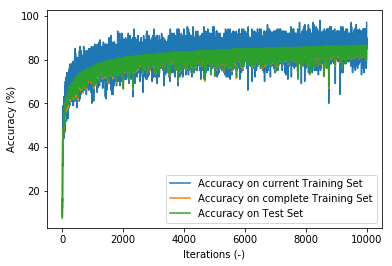

In [9]:
plt.plot( progress_train_current, label = 'Accuracy on current Training Set' )

plt.plot( progress_train, label = 'Accuracy on complete Training Set' )

plt.plot( progress_test, label = 'Accuracy on Test Set' )

plt.legend( loc = 'best' )

plt.xlabel( 'Iterations (-)' )

plt.ylabel( 'Accuracy (%)' )

If we compare this result to [lesson 0014](https://github.com/Mathhead/Lessons-in-Machine-Learning/blob/master/lesson_0014_mnist_classification_neural_network.ipynb), we notice that this neural network does not perform as well as the one in [lesson 0014](https://github.com/Mathhead/Lessons-in-Machine-Learning/blob/master/lesson_0014_mnist_classification_neural_network.ipynb). We could continue on training, but on my machine, this already took more than half a day.<br> 
When comparing the two models, we also notice, that the variance of the performance of this network is much higher than the performance of the network in [lesson 0014](https://github.com/Mathhead/Lessons-in-Machine-Learning/blob/master/lesson_0014_mnist_classification_neural_network.ipynb).<br>
From this, we learn, that more layers is not necessarily good. For now, we close the session.

In [10]:
sess.close()

Class dismissed.